In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import statsmodels.formula.api as sm 
warnings.filterwarnings("ignore")

# Binary response variable 
- we'll use here the churn dataset 
- it has a binary variable which is "has_churned"
- That means for each customer we are determining if the custormer leave or stop doing business with the company during a time period . 

In [6]:
churn_data =pd.read_csv("churn_data.csv")

In [10]:
churn_data.sample(5)

,has_churned,time_since_first_purchase,time_since_last_purchase
328,1,-0.736777,0.115340
61,0,0.695503,-0.396228
397,1,-0.426195,0.684666
128,0,-1.108126,-0.565376
257,1,0.519057,-0.569501


- Using a a numerical variable in response instead of a logical variable make plotting code  easy
- The time columns contain negative values because they've been standardized for confidentiality reasons 

# Visualize the data 

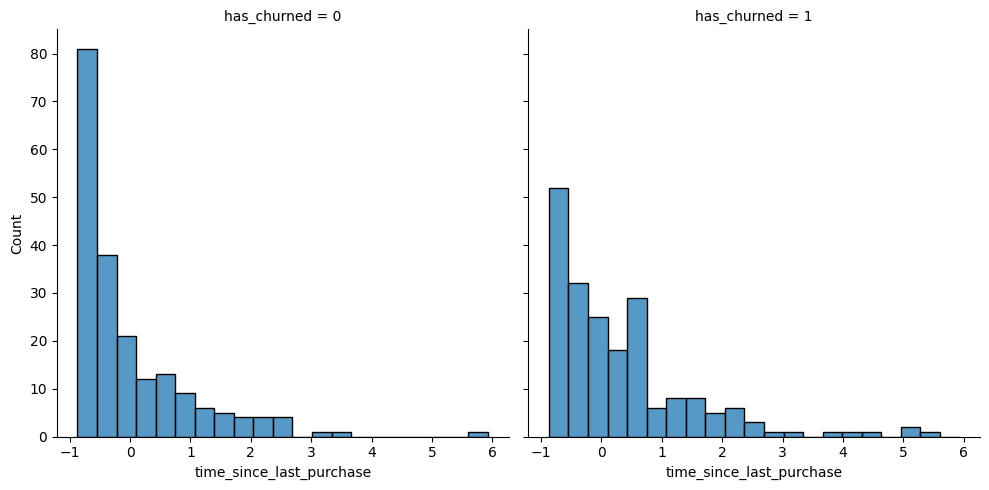

In [56]:
sns.displot(x="time_since_last_purchase" , col="has_churned",data=churn_data , col_wrap = 2)

plt.show()

- As you can see based on histograms the distribution of the variable "time_since_last_purchase" ,  when the response is equal to 1 is more skewed than the other distribution when  the response is equal to 0 , that means for higher values of "time_since_last_purchase"  the clients are more likely to turn their backs on the company . 

- The opposite is true for the variable "time_since_first_purchase"

In [23]:
# Let's run a linear regression model on data , for classification purposes 
mdl_churn_vs_recency_lm = sm.ols ("has_churned ~time_since_last_purchase",data=churn_data).fit()
print(mdl_churn_vs_recency_lm.params)
intercept  =mdl_churn_vs_recency_lm.params["Intercept"]
slope =mdl_churn_vs_recency_lm.params["time_since_last_purchase"]

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


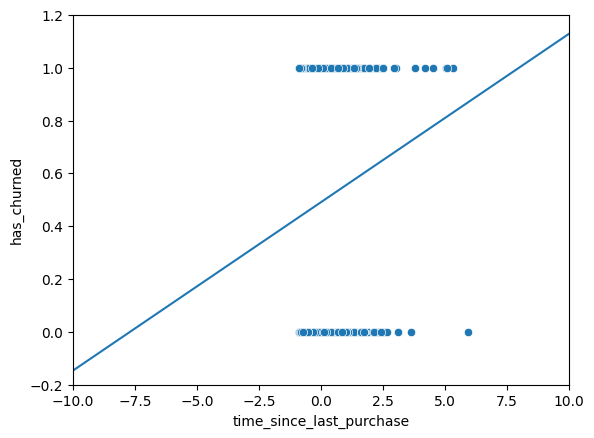

In [27]:
sns.scatterplot(x="time_since_last_purchase" , y="has_churned" , data=churn_data)
plt.axline(xy1=(0,intercept),slope=slope)
#Zooming  on data 
plt.xlim(-10,10)
plt.ylim(-0.2,1.2)
plt.show()


- The model predicts some negative probabilities which doesn't make sense
- Also  the model predicts some probabilities that  surpass 1 . <br>
$\implies$ <b><font color="red">We need a model , that provide accurate probabilities , between 0 and 1 . </font></b>

- So What exactly  logistic regression ?
  - Logistic regression is a generalized linear model , used when <b><font color="red"> The response variable is logical</font></b>
  - The response  follow a logistic ("S_shaped") curve,not a straight line


In [29]:
from statsmodels.formula.api import logit
mdl_churn_vs_recency_logit = logit("has_churned~time_since_last_purchase",data=churn_data).fit()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


In [31]:
print(mdl_churn_vs_recency_logit.params)

Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


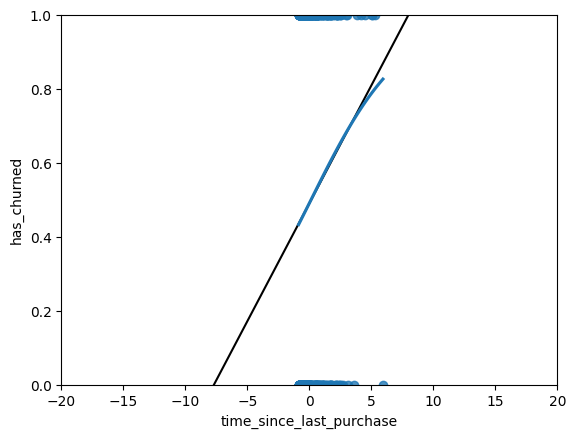

In [55]:
plt.axline(xy1=(0,intercept),slope=slope,color="black") 
sns.regplot(x="time_since_last_purchase" ,y="has_churned" , data =churn_data,ci=None , logistic=True)
# We should set the attribute logistic to true , because we are trying to fit here a logistic regression model , because the  logistic regression curve is curved


#The blue line is curved , that means blue trend line doesn't follow a linear behaviour 

plt.xlim(-20,20)
plt.ylim(0,1)
plt.show()


- Interpretation : 
  - When the time since last purchase is very small , the probability of churning is close to zero 

# Predictions and odds ratios 

In [68]:
predictions = pd.DataFrame({"time_since_last_purchase":np.arange(-1,6.25,0.25)})

predictions=explanatory_data.assign(has_churned=mdl_churn_vs_recency_logit.predict(explanatory_data))

In [69]:
predictions.head()

,time_since_last_purchase,has_churned
0,-1.00,0.424523
1,-0.75,0.441043
2,-0.50,0.457695
3,-0.25,0.474441
4,0.00,0.491246


<AxesSubplot: xlabel='time_since_last_purchase', ylabel='has_churned'>

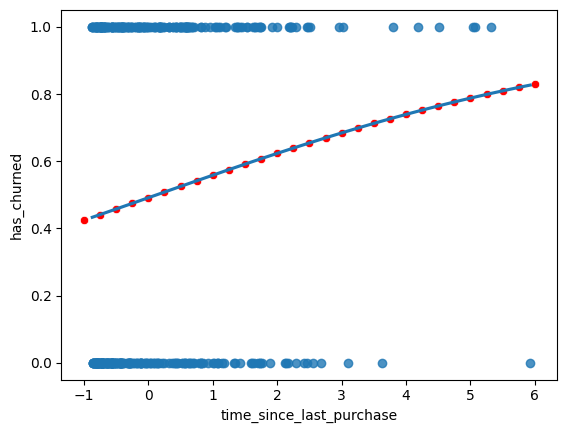

In [70]:
#Adding point predictions 
sns.regplot(x="time_since_last_purchase" ,y="has_churned" , data =churn_data,ci=None , logistic=True)
sns.scatterplot(x="time_since_last_purchase" , y="has_churned" , data=predictions,color="red")


# Getting the most likely outcome
  - If the probability is less than  0.5 which is a threshold then , the most likely outcome is that they won't churn. 
  - To calculate this simply use the round method .

In [71]:
predictions["most_likely_outcome"] = np.round(predictions["has_churned"])

In [72]:
predictions

,time_since_last_purchase,has_churned,most_likely_outcome
0,-1.00,0.424523,0.0
1,-0.75,0.441043,0.0
2,-0.50,0.457695,0.0
3,-0.25,0.474441,0.0
4,0.00,0.491246,0.0
5,0.25,0.508070,1.0
6,0.50,0.524876,1.0
7,0.75,0.541626,1.0
8,1.00,0.558283,1.0
9,1.25,0.574809,1.0


<AxesSubplot: xlabel='time_since_last_purchase', ylabel='has_churned'>

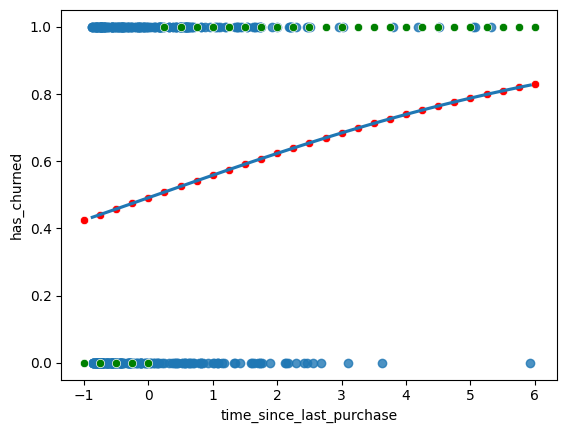

In [73]:
#okey now let's visualize it 
sns.regplot(x="time_since_last_purchase" ,y="has_churned" , data =churn_data,ci=None , logistic=True)
sns.scatterplot(x="time_since_last_purchase" , y="has_churned" , data=predictions,color="red")
sns.scatterplot(x="time_since_last_purchase" , y="most_likely_outcome" , data=predictions,color="green")


The most likely outcome is one , that means , people tend to churn more 


# Odds ratio 
- Is the probability of something happening divided by the probability that it doesn't<span style="margin-left:10px"></span>$odds\_ratio=\frac{probability}{1-probability}$
- That means  an event with high odd ratio  is more likely to happen 

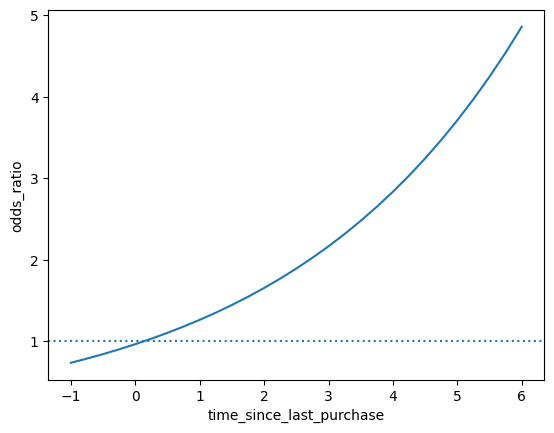

In [80]:
#let's visualize it 

predictions["odds_ratio"] = predictions["has_churned"]/(1-predictions["has_churned"])
sns.lineplot(x="time_since_last_purchase" , y="odds_ratio" , data=predictions)
plt.axline(xy1=(0,1),slope=0,linestyle="dotted")

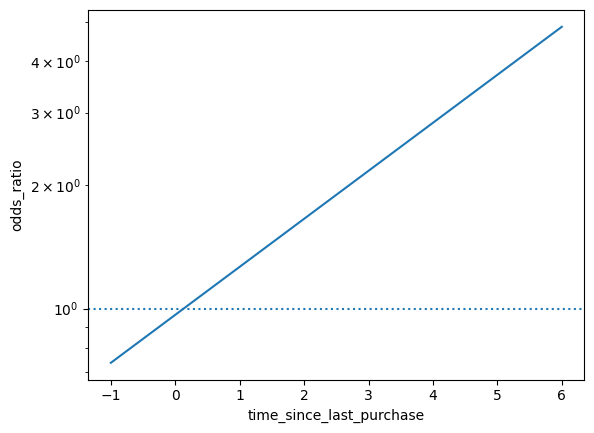

In [81]:
#Visualizing log odds ratio 
sns.lineplot(x="time_since_last_purchase",
y="odds_ratio",
data=predictions)
plt.axhline(y=1,
linestyle="dotted")
plt.yscale("log")
plt.show()

- This is a way of describing logistic regression predictions 

- Non linear predictions makes it hard to interpret ,how changes in the explanatory variable will change the response , as an example log **odds ratio** makes it easy to interpret changes <br>
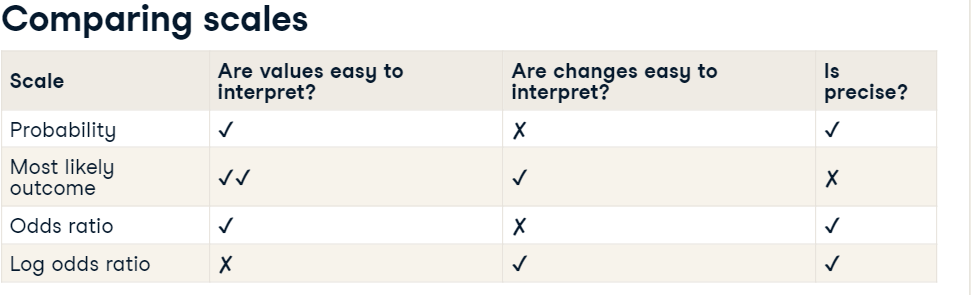

- In summary to reason about changes we use log_odds_ratio . it's better to interpret 

# Quantifying logistic regression fit

- To quantify the the logistic regression fit we use a confusion matrix . 


In [91]:
confusion_matrix = pd.DataFrame({"actual_values":churn_data["has_churned"],"predicted_response":np.round(mdl_churn_vs_recency_logit.predict())})
print(confusion_matrix.groupby(["actual_values","predicted_response"]).agg({"predicted_response":"count"}))

                                  predicted_response
actual_values predicted_response                    
0             0.0                                141
              1.0                                 59
1             0.0                                111
              1.0                                 89


- Based on this , we have 59 false positive(FP) . and 111 false negative(FN) .
-141 true negative(TN) ,and 89 True positive(TP) 


In [93]:
# THis can be created automatically . 
conf_matrix = mdl_churn_vs_recency_logit.pred_table()
print(conf_matrix)

[[141.  59.]
 [111.  89.]]


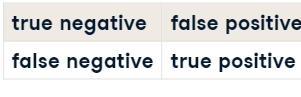

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

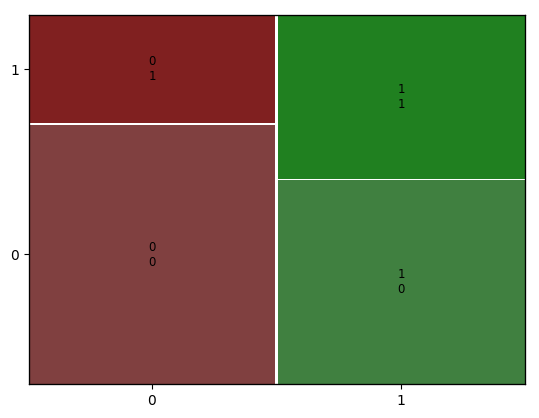

In [97]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

# Quantifying model fit

- $Accuracy =\frac{TN+TP}{TN+TP+FP+FN}$
- Higher acuraccy is better 

- $Sensitivity=\frac{TP}{FP+TP}$ , the proportion of true positives .(within real positive outcomes)
- Higher sensitivity is better 
- $Specificity=\frac{TN}{TN+FP}$ , the proportion of true positives .(within false negative outcomes)
- Higher specifity  is better

- But increasing specifity will decrease sensitivity etc . 



In [98]:
accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/np.sum(conf_matrix)

In [99]:
accuracy

0.575

In [100]:
sensitivity =conf_matrix[1,1]/np.sum(conf_matrix[1])

In [101]:
sensitivity

0.445

In [103]:
specifity = conf_matrix[0,0]/np.sum(conf_matrix[0])
specifity

0.705